# Analyzing the exit surveys of the DETE and TAFE <br/> (work in progress)

In this project, we analyse exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. 
We aim at answering the following two questions: 
* Do employees working for these institutes for short periods of time leave because they are dissatisfied with them?
* How does the result depend on the employees age?

This project will mostly consist in cleaning two databases, corresponding to the DETE and TAFE, with the view of combining them in the analysis. 

## The databases 

As mentioned above, we work with two databases. 
The first one, `dete-exit-survey-january-2014.csv`, downloaded from the [Australian government website](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey), contains staff feedback on why ther resign or retire from the DETE.
It was created on 25 March 2014 and never updated since then. 
The second one, `tafe-employee-exit-survey-access-database-december-2013.csv`, also downloaded from the [Australian government website](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey), contains similar information for the TAFE. 
It was created on 19 March 2014 and last updated on 10 July 2019. 
Both files were originally on the [Queensland Government Open Data Portal](https://www.data.qld.gov.au/).

Let us import the Numpy, Pandas, Seaborn, and Pyplot modules, and the two databases in the Pandas dataframes `dete_survey` and `tafe_survey`. 
We also print some information on each dataset.

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dete_survey = pd.read_csv('../Data/dete-exit-survey-january-2014.csv')
# the second file is encoded in latin-1
tafe_survey = pd.read_csv('../Data/tafe-employee-exit-survey-access-database-december-2013.csv', encoding='latin-1')

print(dete_survey.info())
print()
print(tafe_survey.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

The first dataset has 822 row and 56 columns containing either “objects” (posibly strings) or bools, except the `ID` column which contains integers. 
The second one has 702 row and 72 columns containing “objects”, except the `ID` column whc contains integers and the `CESSATION YEAR` column which contains floats.
In both cases, a significant number of columns have missing values.

Let us now print the first few lines of each dataset.

In [10]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [11]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26  30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41  45,Permanent Full-time,Teacher (including LVT),3-4,3-4


There are numerous issues we will need to deal with: 
* The formats for the dates are different. 
* The meaning of some entries in the first dataset, for example in the column `Kept informed`, is not clear.
* The second dataset has multiple occurrences of “-” denoting missing values.

Let us now visualize graphically the missing date in each dataset.

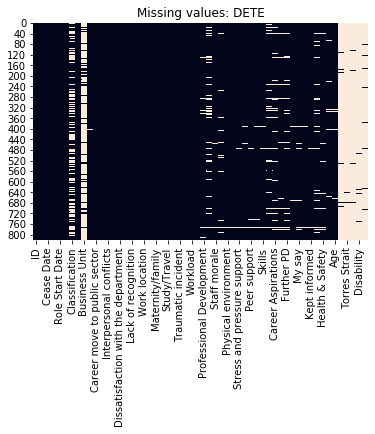

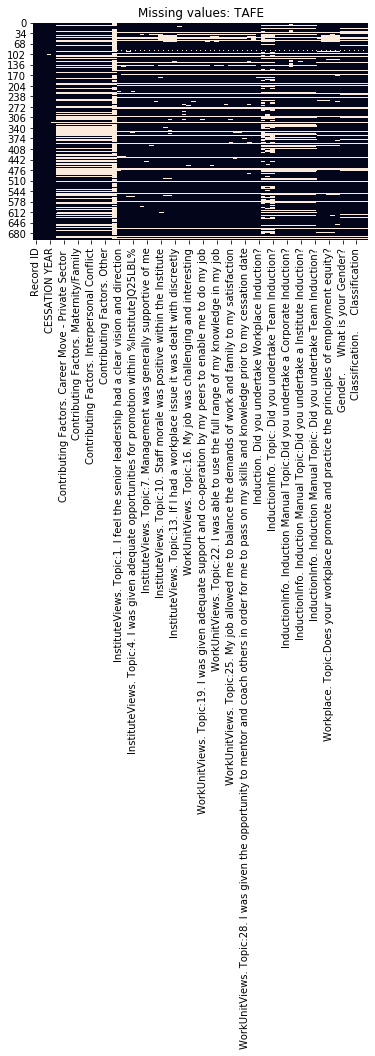

In [21]:
sns.heatmap(dete_survey.isnull(), cbar=False)
plt.title('Missing values: DETE')
plt.show()

sns.heatmap(tafe_survey.isnull(), cbar=False)
plt.title('Missing values: TAFE')
plt.show()

In the TAFE datset, some lines have significantly more missing values than others. 
This is also true, to a lesser extent, for the DETE dataset.